# Exploratory Data Analysis - Check what the fields look like

In [1]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv('GAAssignment0826.csv')

import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df.shape

(211107, 25)

In [3]:
df.columns

Index([u'YR_MNTH', u'GENRE_CAT_FINAL', u'MARKETINGCHANNELGROUP', u'DTE',
       u'NEWBUYER', u'FIRSTPURCHASEGMS', u'NEWBUYERS', u'CONCERTSNEWTOREPEAT',
       u'MLBNEWTOREPEAT', u'NBANEWTOREPEAT', u'NFLNEWTOREPEAT',
       u'NHLNEWTOREPEAT', u'CBBNEWTOREPEAT', u'CFBNEWTOREPEAT',
       u'THEATERNEWTOREPEAT', u'AOSNEWTOREPEAT', u'CONCERTSREPEATGMS',
       u'MLBREPEATGMS', u'NBAREPEATGMS', u'NFLREPEATGMS', u'NHLREPEATGMS',
       u'CBBREPEATGMS', u'CFBREPEATGMS', u'THEATERREPEATGMS', u'AOSREPEATGMS'],
      dtype='object')

In [4]:
#Checking for null values
df.isnull().sum()

YR_MNTH                       0
GENRE_CAT_FINAL               0
MARKETINGCHANNELGROUP         0
DTE                           0
NEWBUYER                      0
FIRSTPURCHASEGMS              0
NEWBUYERS                     0
CONCERTSNEWTOREPEAT           0
MLBNEWTOREPEAT                0
NBANEWTOREPEAT                0
                          ...  
AOSNEWTOREPEAT                0
CONCERTSREPEATGMS        197736
MLBREPEATGMS             203260
NBAREPEATGMS             202833
NFLREPEATGMS             209826
NHLREPEATGMS             205607
CBBREPEATGMS             208464
CFBREPEATGMS             210691
THEATERREPEATGMS         208790
AOSREPEATGMS             206840
Length: 25, dtype: int64

In [5]:
#By business exposure - I know that the null values can be substituted with 0
df=df.fillna(0)

In [6]:
#Counting the null values post filling as a dirty check
df.isnull().sum()

YR_MNTH                  0
GENRE_CAT_FINAL          0
MARKETINGCHANNELGROUP    0
DTE                      0
NEWBUYER                 0
FIRSTPURCHASEGMS         0
NEWBUYERS                0
CONCERTSNEWTOREPEAT      0
MLBNEWTOREPEAT           0
NBANEWTOREPEAT           0
                        ..
AOSNEWTOREPEAT           0
CONCERTSREPEATGMS        0
MLBREPEATGMS             0
NBAREPEATGMS             0
NFLREPEATGMS             0
NHLREPEATGMS             0
CBBREPEATGMS             0
CFBREPEATGMS             0
THEATERREPEATGMS         0
AOSREPEATGMS             0
Length: 25, dtype: int64

In [7]:
df.columns

Index([u'YR_MNTH', u'GENRE_CAT_FINAL', u'MARKETINGCHANNELGROUP', u'DTE',
       u'NEWBUYER', u'FIRSTPURCHASEGMS', u'NEWBUYERS', u'CONCERTSNEWTOREPEAT',
       u'MLBNEWTOREPEAT', u'NBANEWTOREPEAT', u'NFLNEWTOREPEAT',
       u'NHLNEWTOREPEAT', u'CBBNEWTOREPEAT', u'CFBNEWTOREPEAT',
       u'THEATERNEWTOREPEAT', u'AOSNEWTOREPEAT', u'CONCERTSREPEATGMS',
       u'MLBREPEATGMS', u'NBAREPEATGMS', u'NFLREPEATGMS', u'NHLREPEATGMS',
       u'CBBREPEATGMS', u'CFBREPEATGMS', u'THEATERREPEATGMS', u'AOSREPEATGMS'],
      dtype='object')

# Adding the Test/Train Split here

In [8]:
#Adding the Test Train Split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dfTrain, dfTest = train_test_split(df, test_size = 0.5)

# Beginning the Exploratory Data Analysis

In [9]:
#Checking the size of the test and train columns to be sure
dfTrain.shape

(105553, 25)

In [10]:
dfTest.shape

(105554, 25)

In [11]:
#Replacing the values in the dataframe for cases where the marketing channel is unknown
dfTrain['MARKETINGCHANNELGROUP'].replace('Unknown', 'Direct',inplace=True)

/Users/issingh/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
dfTrain.MARKETINGCHANNELGROUP.unique()

array(['Direct', 'Paid Search', 'SEO', 'Affiliates', 'eBay', 'Email',
       'MLBAM', 'Stubhub.com', 'Contextual', 'stubhub.com',
       'Digital Marketing', 'LGAFL - TDC - Checkout', 'Social',
       'Push Notifications', 'Paid Social'], dtype=object)

In [13]:
dfTrain['MARKETINGCHANNELGROUP'].value_counts()

Direct                    54568
Paid Search               25329
SEO                       22289
Contextual                 1007
Affiliates                  699
Email                       475
Stubhub.com                 430
MLBAM                       361
stubhub.com                 140
eBay                        109
LGAFL - TDC - Checkout       98
Digital Marketing            35
Social                       11
Push Notifications            1
Paid Social                   1
Name: MARKETINGCHANNELGROUP, dtype: int64

In [14]:
#Limiting the dataset to direct, paid search and SEO
dfTrain = dfTrain[dfTrain['MARKETINGCHANNELGROUP'].isin(['Direct','Paid Search','SEO'])]

In [15]:
dfTrain.shape

(102186, 25)

In [16]:
dfTrain.MARKETINGCHANNELGROUP.value_counts()

Direct         54568
Paid Search    25329
SEO            22289
Name: MARKETINGCHANNELGROUP, dtype: int64

In [17]:
#One Hot Encoding will be needed for all Categorical variables

onehot1 = pd.get_dummies(dfTrain['MARKETINGCHANNELGROUP'])
onehot2 = pd.get_dummies(dfTrain['GENRE_CAT_FINAL'])


In [18]:
dfTrain=dfTrain.join(onehot1)
dfTrain=dfTrain.join(onehot2)

In [19]:
dfTrain.columns

Index([u'YR_MNTH', u'GENRE_CAT_FINAL', u'MARKETINGCHANNELGROUP', u'DTE',
       u'NEWBUYER', u'FIRSTPURCHASEGMS', u'NEWBUYERS', u'CONCERTSNEWTOREPEAT',
       u'MLBNEWTOREPEAT', u'NBANEWTOREPEAT', u'NFLNEWTOREPEAT',
       u'NHLNEWTOREPEAT', u'CBBNEWTOREPEAT', u'CFBNEWTOREPEAT',
       u'THEATERNEWTOREPEAT', u'AOSNEWTOREPEAT', u'CONCERTSREPEATGMS',
       u'MLBREPEATGMS', u'NBAREPEATGMS', u'NFLREPEATGMS', u'NHLREPEATGMS',
       u'CBBREPEATGMS', u'CFBREPEATGMS', u'THEATERREPEATGMS', u'AOSREPEATGMS',
       u'Direct', u'Paid Search', u'SEO', u'All Other Sports',
       u'College Basketball', u'College Football', u'Concerts', u'MLB', u'NBA',
       u'NFL', u'NHL', u'Theater'],
      dtype='object')

In [20]:
dfTrain=dfTrain.drop('YR_MNTH',1)
dfTrain=dfTrain.drop('GENRE_CAT_FINAL',1)
dfTrain=dfTrain.drop('MARKETINGCHANNELGROUP',1)
dfTrain=dfTrain.drop('NEWBUYER',1)

In [21]:
dfTrain.columns

Index([u'DTE', u'FIRSTPURCHASEGMS', u'NEWBUYERS', u'CONCERTSNEWTOREPEAT',
       u'MLBNEWTOREPEAT', u'NBANEWTOREPEAT', u'NFLNEWTOREPEAT',
       u'NHLNEWTOREPEAT', u'CBBNEWTOREPEAT', u'CFBNEWTOREPEAT',
       u'THEATERNEWTOREPEAT', u'AOSNEWTOREPEAT', u'CONCERTSREPEATGMS',
       u'MLBREPEATGMS', u'NBAREPEATGMS', u'NFLREPEATGMS', u'NHLREPEATGMS',
       u'CBBREPEATGMS', u'CFBREPEATGMS', u'THEATERREPEATGMS', u'AOSREPEATGMS',
       u'Direct', u'Paid Search', u'SEO', u'All Other Sports',
       u'College Basketball', u'College Football', u'Concerts', u'MLB', u'NBA',
       u'NFL', u'NHL', u'Theater'],
      dtype='object')

In [22]:
dfTrain.describe()

DTE  FIRSTPURCHASEGMS  NEWBUYERS  CONCERTSNEWTOREPEAT  \
count  102186.000000     102186.000000   102186.0        102186.000000   
mean       35.318312        290.660824        1.0             0.063296   
std        53.589322        652.846638        0.0             0.243496   
min         0.000000          3.000000        1.0             0.000000   
25%         2.000000        100.000000        1.0             0.000000   
50%        12.000000        186.000000        1.0             0.000000   
75%        48.000000        328.000000        1.0             0.000000   
max       494.000000      78419.000000        1.0             1.000000   

       MLBNEWTOREPEAT      ...                  MLB            NBA  \
count   102186.000000      ...        102186.000000  102186.000000   
mean         0.036130      ...             0.031178       0.214648   
std          0.186615      ...             0.173801       0.410580   
min          0.000000      ...             0.000000       0.000000   
25%          0.000000      ...             0.000000       0.000000   
50%          0.000000      ...             0.000000       0.000000   
75%          0.000000      ...             0.000000       0.000000   
max          1.000000      ...             1.000000       1.000000   

                 NFL            NHL        Theater  
count  102186.000000  102186.000000  102186.000000  
mean        0.041924       0.148611       0.068375  
std         0.200415       0.355707       0.252390  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 33 columns]

In [23]:
#Creating another column for Repeat Purchase
dfTrain['RepeatFlag'] = (((dfTrain.CONCERTSNEWTOREPEAT>0) + (dfTrain.MLBNEWTOREPEAT>0)
+ (dfTrain.NBANEWTOREPEAT>0) + (dfTrain.NFLNEWTOREPEAT>0) + (dfTrain.NHLNEWTOREPEAT>0) + (dfTrain.CBBNEWTOREPEAT>0)
+ (dfTrain.CFBNEWTOREPEAT>0) + (dfTrain.THEATERNEWTOREPEAT>0) + (dfTrain.AOSNEWTOREPEAT>0))>0)*1

/Users/issingh/anaconda/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [24]:
dfTrain.RepeatFlag.value_counts()

0    82525
1    19661
Name: RepeatFlag, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b69ad90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cce9dd0>], dtype=object)

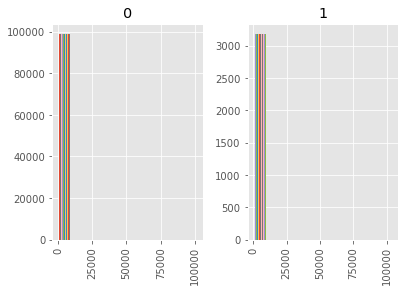

In [25]:
dfTrain.hist(by=dfTrain['MLB'])

In [26]:
dfTrain.columns

Index([u'DTE', u'FIRSTPURCHASEGMS', u'NEWBUYERS', u'CONCERTSNEWTOREPEAT',
       u'MLBNEWTOREPEAT', u'NBANEWTOREPEAT', u'NFLNEWTOREPEAT',
       u'NHLNEWTOREPEAT', u'CBBNEWTOREPEAT', u'CFBNEWTOREPEAT',
       u'THEATERNEWTOREPEAT', u'AOSNEWTOREPEAT', u'CONCERTSREPEATGMS',
       u'MLBREPEATGMS', u'NBAREPEATGMS', u'NFLREPEATGMS', u'NHLREPEATGMS',
       u'CBBREPEATGMS', u'CFBREPEATGMS', u'THEATERREPEATGMS', u'AOSREPEATGMS',
       u'Direct', u'Paid Search', u'SEO', u'All Other Sports',
       u'College Basketball', u'College Football', u'Concerts', u'MLB', u'NBA',
       u'NFL', u'NHL', u'Theater', u'RepeatFlag'],
      dtype='object')

# Using decision trees to perform feature selection

In [27]:
X_train=dfTrain.drop('RepeatFlag',1)
X_train=X_train.drop('NEWBUYERS',1)
X_train=X_train.drop('CONCERTSNEWTOREPEAT',1)
X_train=X_train.drop('MLBNEWTOREPEAT',1)
X_train=X_train.drop('NBANEWTOREPEAT',1)
X_train=X_train.drop('NFLNEWTOREPEAT',1)
X_train=X_train.drop('NHLNEWTOREPEAT',1)
X_train=X_train.drop('CBBNEWTOREPEAT',1)
X_train=X_train.drop('CFBNEWTOREPEAT',1)
X_train=X_train.drop('THEATERNEWTOREPEAT',1)
X_train=X_train.drop('AOSNEWTOREPEAT',1)
X_train=X_train.drop('CONCERTSREPEATGMS',1)
X_train=X_train.drop('MLBREPEATGMS',1)
X_train=X_train.drop('NBAREPEATGMS',1)
X_train=X_train.drop('NFLREPEATGMS',1)
X_train=X_train.drop('NHLREPEATGMS',1)
X_train=X_train.drop('CBBREPEATGMS',1)
X_train=X_train.drop('CFBREPEATGMS',1)
X_train=X_train.drop('THEATERREPEATGMS',1)
X_train=X_train.drop('AOSREPEATGMS',1)

In [28]:
X_train = X_train[X_train.NHL<1]

In [29]:
X_train.columns

Index([u'DTE', u'FIRSTPURCHASEGMS', u'Direct', u'Paid Search', u'SEO',
       u'All Other Sports', u'College Basketball', u'College Football',
       u'Concerts', u'MLB', u'NBA', u'NFL', u'NHL', u'Theater'],
      dtype='object')

In [30]:
y_train1= dfTrain[dfTrain.NHL<1]

In [31]:
y_train = (y_train1.NHLNEWTOREPEAT > 0)*1

/Users/issingh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


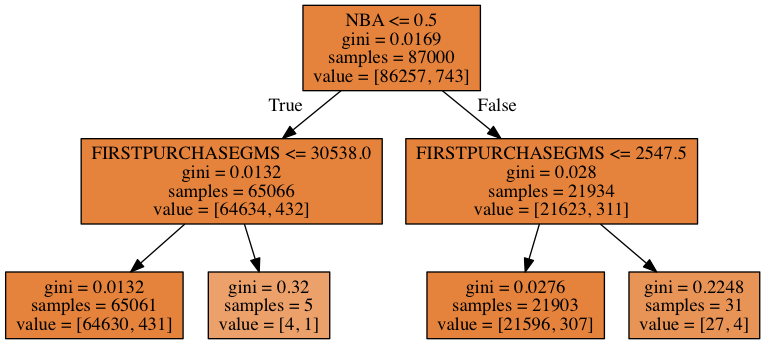

In [32]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

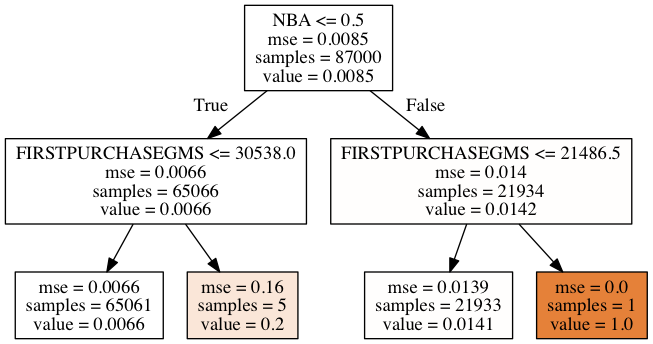

In [33]:
#Adding another version of decision tree just to see if removing DTE makes a difference


from sklearn import preprocessing
from sklearn import utils

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

# Testing out the k-nearest neighbors

In [34]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [35]:
# using the K nearest neighbors to see what the result looks like
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
#https://www.youtube.com/watch?v=6dbrR-WymjI
k_cv = 5 # 5-fold CV
k_nn = range(1, X_train.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(X_train, y_train)

In [ ]:
gs.cv_results_.keys()

In [179]:
#Checking if the same categorization is showing up twice
((df['MultipleGCFRepeatBuyer'] +df['TheaterRepeatBuyer'] +df['One&Done'])==1).sum()

127920

In [180]:
#Adding another category here
def func(row):
    if row['MultipleGCFRepeatBuyer'] == 1:
        return 'MultipleGCFRepeatBuyer'
    elif row['TheaterRepeatBuyer'] == 1:
        return 'TheaterRepeatBuyer' 
    else:
        return 'One&Done'

df['Segment'] = df.apply(func, axis=1)

/Users/issingh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [181]:
df.Segment.value_counts()

One&Done                  112234
MultipleGCFRepeatBuyer     10096
TheaterRepeatBuyer          5590
Name: Segment, dtype: int64

In [34]:
df.columns

Index([u'DTE', u'MARKETINGCHANNELGROUP', u'USER_ID', u'FIRST_PRCHS_DATE',
       u'GENRE_CAT_FINAL', u'ARTISTCATEGORY', u'TICKETSSOLDFP', u'GMSFP',
       u'GCFS', u'M12TICKETSSOLD', u'M12GMS', u'MultipleGCFRepeatBuyer',
       u'TheaterRepeatBuyer', u'One&Done', u'Segment'],
      dtype='object')

In [ ]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

In [63]:
#Limiting the dataset to direct, paid search and SEO
df = df[df['MARKETINGCHANNELGROUP'].isin(['Direct','Paid Search','SEO'])]

In [64]:
#Adding the one hot encoding in this section
onehot1 = pd.get_dummies(df['MARKETINGCHANNELGROUP'])
onehot2 = pd.get_dummies(df['ARTISTCATEGORY'])

In [65]:
df2=df.join(onehot1)
df2=df2.join(onehot2)

In [70]:
df2.columns
df2['RepeatPurchase'] = (df2.M12TICKETSSOLD >0)*1

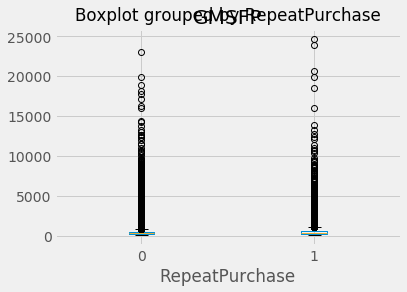

In [163]:
df.boxplot(column='GMSFP',by='RepeatPurchase')

In [175]:
df.RepeatPurchase.value_counts()

0    112234
1     15686
Name: RepeatPurchase, dtype: int64

In [176]:
df2.shape

(127403, 25)

In [140]:
df2 = df2[df2.GMSFP>0]
y_train = df2.RepeatPurchase
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

In [141]:
X_train.columns

Index([u'DTE', u'GMSFP', u'Direct', u'Paid Search', u'SEO', u'1.TOP 50',
       u'2.50-100', u'3.100-200', u'4.200-600', u'5.600-1000', u'6.>1000'],
      dtype='object')

In [143]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;


In [144]:
#Now splitting the data and rerunning
#The parameter random state here is used to ensure that everytime we run the same split again, we end 
#with the exact same dataset

#Step 1
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.5, random_state=42)

#Step 2
logr = LogisticRegression()
logr.fit(X_train, y_train)

#Step 3
#Scoring the model on the training data 
score = logr.score(X_train,y_train)
print "The accuracy score for the training data set is {:.2f} percent".format(score*100)

pred_labels = logr.predict(X_test)


#Step 4
testing_score = accuracy_score(y_test, logr.predict(X_test))
print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The accuracy score for the training data set is 87.65 percent
The model accurately classified 87.84 percent of the testing data


In [145]:
#Pass the predictions and y_test into a confusion matrix
confusion_matrix(y_test, pred_labels)

array([[55950,     8],
       [ 7741,     3]])

In [146]:
#Calculate precision and recall scores
ps = float(precision_score(y_test, pred_labels))
rs = float(recall_score(y_test, pred_labels))

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 27.27 and the recall score is 0.04


In [147]:
#We have to calculate false positive score using our function

def FPR(YT, PR): 
    """
    YT is the target variable for the testing set
    PR is the predictions made on the features of the testing set
    """
    CM = confusion_matrix(YT, PR)
    TN = CM[0, 0]
    FP = CM[0, 1]
    FPR = FP/(float(FP+ TN))
    return FPR

In [148]:
FPR(y_test, pred_labels)

0.00014296436613174166

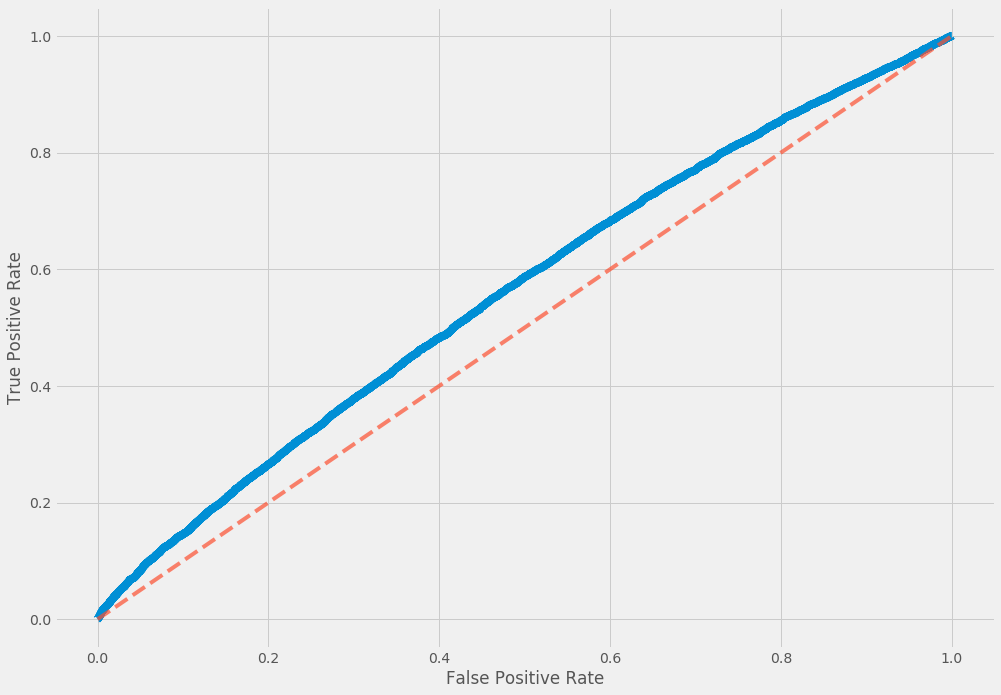

In [149]:
#Derive probabilities of class 1 from the test set
test_probs = logr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Will explain the fpr, tpr, thresholds
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()


In [150]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

0.56062107503369563

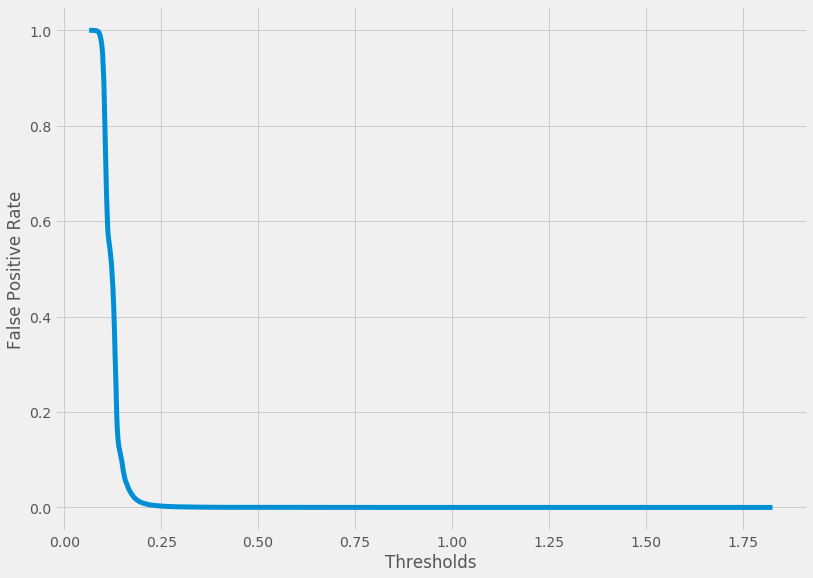

In [151]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate");

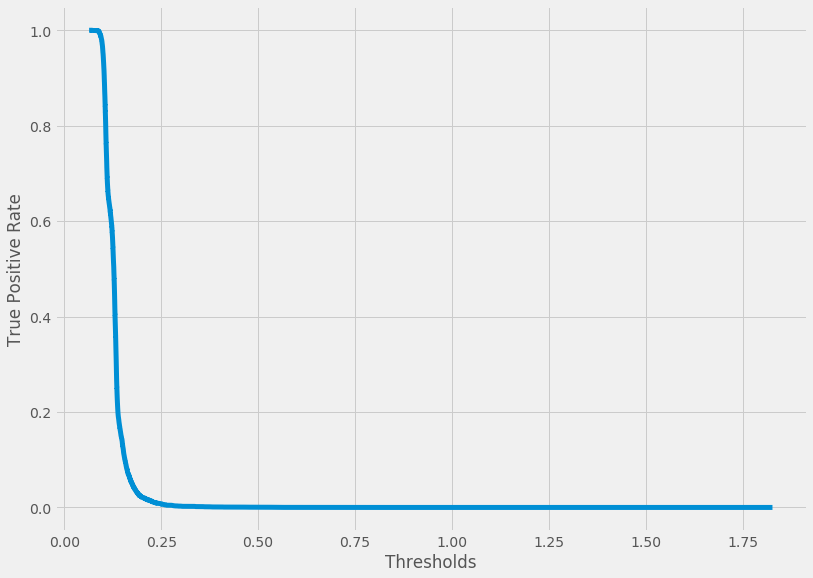

In [152]:
plt.figure(figsize=(12,9))
plt.plot(thres, tpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("True Positive Rate");

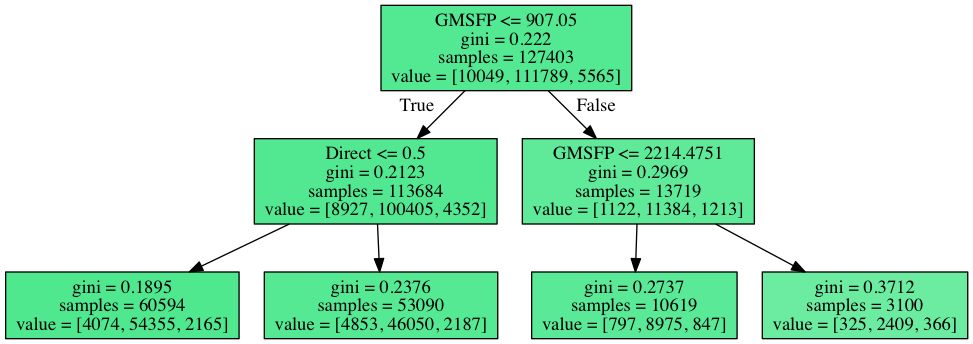

In [182]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df2 = df2[df2.GMSFP>0]
y_train = df2.Segment
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

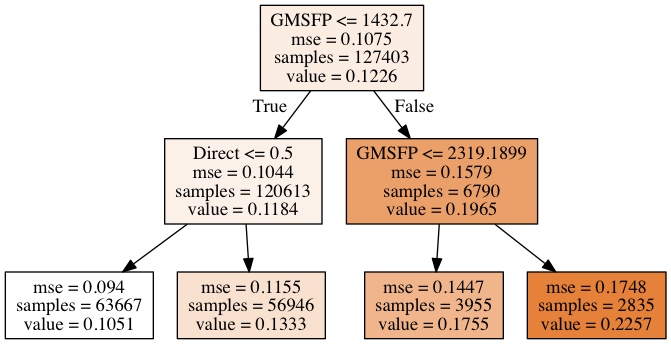

In [165]:
#Adding another version of decision tree just to see if removing DTE makes a difference


from sklearn import preprocessing
from sklearn import utils

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

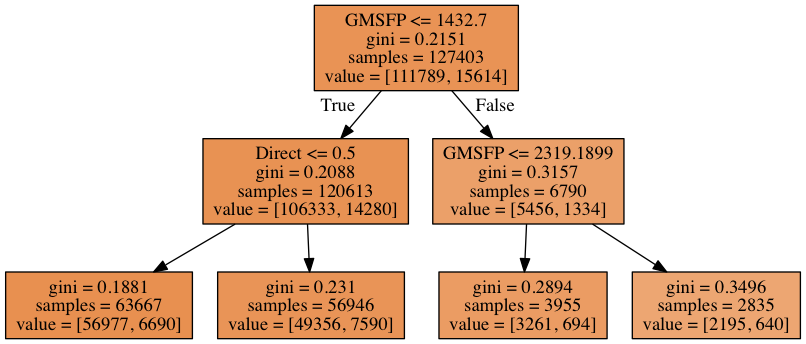

In [164]:

y_train = df2.RepeatPurchase
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

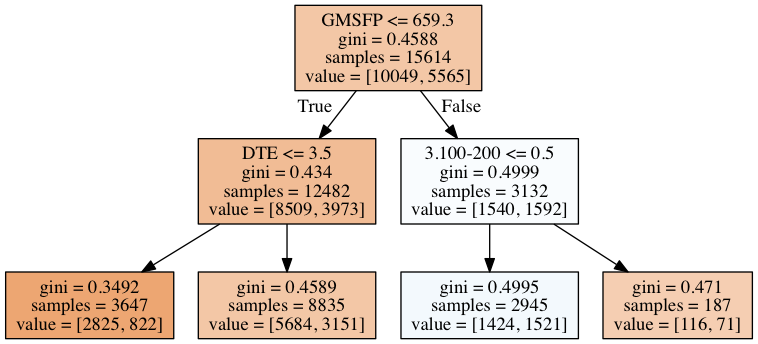

In [187]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df2.RepeatPurchase>0]
y_train = df3.Segment
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

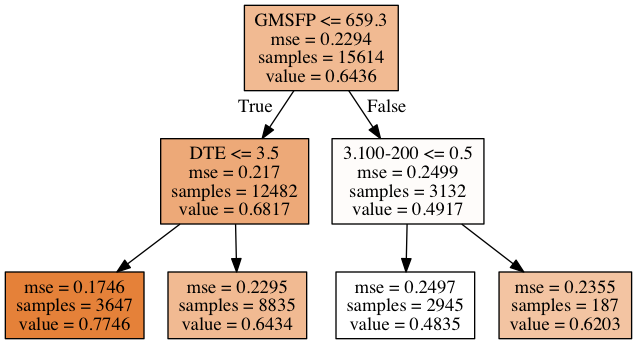

In [196]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df3.RepeatPurchase>0]
y_train = df3.MultipleGCFRepeatBuyer
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

In [198]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df3.RepeatPurchase>0]

y_train = df3.MultipleGCFRepeatBuyer
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)
X_train = X_train.drop('Direct',1)
X_train = X_train.drop('Paid Search',1)
X_train = X_train.drop('SEO',1)
X_train = X_train.drop('1.TOP 50',1)
X_train = X_train.drop('2.50-100',1)
X_train = X_train.drop('3.100-200',1)
X_train = X_train.drop('4.200-600',1)
X_train = X_train.drop('5.600-1000',1)
X_train = X_train.drop('6.>1000',1)

In [199]:
X_train.columns

Index([u'DTE', u'GMSFP'], dtype='object')

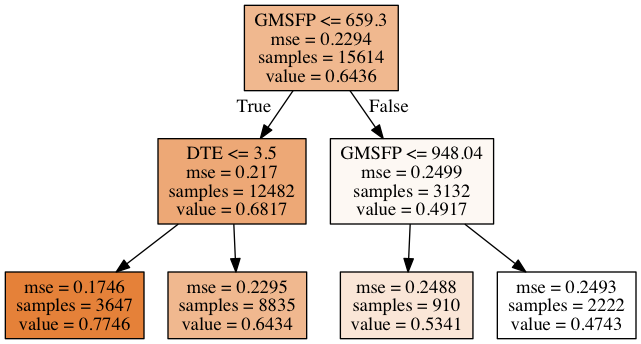

In [200]:



import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')